In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Para gráficos
import seaborn as sns           # Para gráficos
import scipy.stats as stats     # Para calcular funciones de densidad
import os

In [10]:
#  ==== OBTENCION DE DATOS

# Obtén la ruta absoluta del arhivo actual
current_dir = os.getcwd() 

path_datasets = os.path.join(current_dir,"datasets/AlojamientosAirBnb.csv")

#Construimos el dataframe
df = pd.read_csv(path_datasets)

df

,id,precio,tipo,valoraciones,puntaje,personas,dormitorios,banios,estadia,distancia,dependencias
0,1,50,Entire home/apt,1,4.5,2,0,1,3,548.130725,14
1,2,24,Private room,14,5.0,1,1,1,1,1623.405252,31
2,3,65,Private room,0,0.0,2,1,0,1,1529.740914,5
3,4,65,Private room,0,0.0,2,1,1,1,1703.897887,6
4,5,65,Private room,0,0.0,2,1,0,1,1562.032545,5
...,...,...,...,...,...,...,...,...,...,...,...
5391,5392,12,Private room,0,0.0,1,1,1,7,1155.622409,1
5392,5393,45,Entire home/apt,0,0.0,3,2,1,1,383.097032,1
5393,5394,70,Entire home/apt,0,0.0,3,1,1,7,470.436150,32
5394,5395,90,Entire home/apt,0,0.0,4,1,1,3,1911.506302,6


## Estimación por Mínimos Cuadrados Ordinarios (MCO)

Dada una muestra aleatoria de tamaño $n$ de la población $\{y_i: i=1,...,n \}$ podemos escribir cada observación de la muestra como
$$y_i=\mu_y+u_i$$

Nos interesa estimar el parámetro poblacional $\mu_y$ usando la muestra. si estimamos el parámetro, nos quedará un residuo estimado por observación. El residuo $\hat{u}_i$ es un estimador del término del error $u_i$ y es la diferencia entre la media estimada y la i-ésima observación muestral.

$$y_i=\hat{\mu}_y+\hat{u}_i$$

El método de estimación **Mínimos Cuadrados Ordinarios** selecciona un valor del estimador del parámetro de tal forma que la sumatoria de los residuos estimados al cuadrado sea mínima. Es decir, elije el valor del parámetro que minimiza la siguiente expresión:

$$\sum_{i=1}^n(\hat{u}_i)^2=\sum_{i=1}^n(y_i-\hat{\mu}_y)^2$$

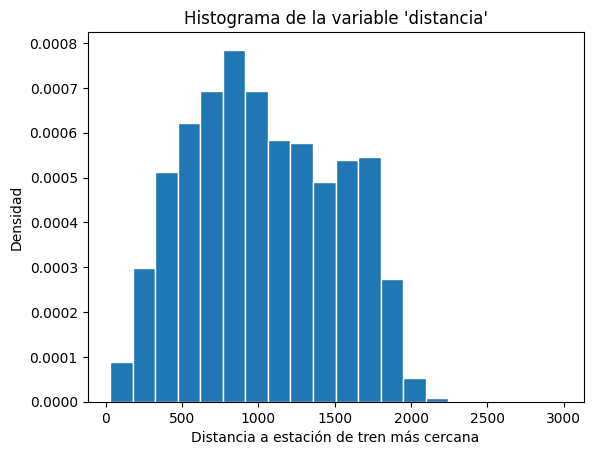

In [11]:
plt.hist(df['distancia'], bins=20, edgecolor="white", density=True)
plt.xlabel('Distancia a estación de tren más cercana')
plt.ylabel('Densidad')
plt.title("Histograma de la variable 'distancia'")
plt.show()

En base a nuestra observacion vemos que hay mucha concentracion de datos entre 500-1000-1500.
Entonces vamos a calcular el MCO en esos rangos.

In [12]:
#definimos las posibles medias
posibles_medias = np.arange(500,1500,0.1)

#Df que contendra los datos
df_estimacion = pd.DataFrame(columns=['sum_u2','media','error_standar'])

#Hacemos una iteraccion donde calculamos el MCO para cada media posible.
for media in posibles_medias:

    #Calculo del MCO
    sum_u2 = sum((df['distancia'] - media) ** 2 )

    #Varianza muestral
    sigma_muestral = np.sqrt(sum((df['distancia'] - media) ** 2 ) / len(df['distancia'] - 1))

    #Calculo del error standar
    error_standar = sigma_muestral / np.sqrt(len(df['distancia']))

    nueva_fila = {'sum_u2':sum_u2, 'media':media,'error_standar':error_standar}

    df_estimacion.loc[len(df_estimacion)] = nueva_fila

In [14]:
df_estimacion

,sum_u2,media,error_standar
0,2.741540e+09,500.0,9.703433
1,2.740965e+09,500.1,9.702414
2,2.740390e+09,500.2,9.701396
3,2.739815e+09,500.3,9.700378
4,2.739240e+09,500.4,9.699360
...,...,...,...
9995,2.380656e+09,1499.5,9.042247
9996,2.381159e+09,1499.6,9.043203
9997,2.381662e+09,1499.7,9.044158
9998,2.382166e+09,1499.8,9.045114


In [18]:
mu_minimo = df_estimacion[df_estimacion['sum_u2'] == min(df_estimacion['sum_u2'])]
ee_minimo = df_estimacion[df_estimacion['error_standar'] == min(df_estimacion['error_standar'])]
print("MINIMO: ") 
print(mu_minimo)
print("ESPERANZA DE LAS MEDIAS")
print(np.mean(df_estimacion['media']))
print("\n")
print("FILA DEL ERROR ESTANDAR MINIMO: ")
print(ee_minimo)

MINIMO:              sum_u2   media  error_standar
5332  1.207407e+09  1033.2        6.43954
ESPERANZA DE LAS MEDIAS
999.9500000001136


FILA DEL ERROR ESTANDAR MINIMO: 
            sum_u2   media  error_standar
5332  1.207407e+09  1033.2        6.43954
